In [ ]:
# 台灣銀行牌告匯率爬蟲練習
# 範例1： 練習爬取台幣對其他貨幣匯率資料

In [6]:
import requests
from bs4 import BeautifulSoup
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# 進入台灣銀行牌告匯率網頁：https://rate.bot.com.tw/xrt?Lang=zh-TW ，擷取當日台幣對美金的匯率資訊

In [26]:
# 進入台灣銀行牌告匯率網頁，查看當日匯率資料
url = 'https://rate.bot.com.tw/xrt?Lang=zh-TW'
resp = requests.get(url)
resp.encoding = 'utf-8'

html = BeautifulSoup(resp.text,'lxml')
# print(html)
rate_table = html.find(name = 'table', attrs = {'title':'牌告匯率'}).find(name='tbody').find_all(name='tr')
# print(rate_table)

# 查詢美金(也就是匯率表的第一個元素)對台幣的匯率
currency = rate_table[0].find(name='div',attrs={'class':'visible-phone print_hide'})
print(currency.get_text().replace(" ",""))

buy_rate = rate_table[0].find(name = 'td',attrs = {'data-table':'本行現金買入'})
sell_rate = rate_table[0].find(name = 'td',attrs ={'data-table':'本行現金賣出'})
print('即時現今買入:%s, 即時現金賣出:%s' %(buy_rate.get_text(),sell_rate.get_text()))


美金(USD)

即時現今買入:28.94, 即時現金賣出:29.61


In [ ]:
# 作業part 1：請參考上面的範例，試著爬取所有貨幣對台幣的匯率

In [31]:
for rt in rate_table:
    currency = rt.find(name='div', attrs={'class':'visible-phone print_hide'})
    print(currency.get_text().replace(" ",""))
    buy_rate = rt.find(name='td', attrs={'data-table':'本行現金買入'})
    sell_rate = rt.find(name='td',attrs={'data-table':'本行現金賣出'})
    print('即時現今買入:%s, 即時現金賣出:%s' %(buy_rate.get_text(),sell_rate.get_text()))


美金(USD)

即時現今買入:28.94, 即時現金賣出:29.61

港幣(HKD)

即時現今買入:3.629, 即時現金賣出:3.833

英鎊(GBP)

即時現今買入:37.97, 即時現金賣出:40.09

澳幣(AUD)

即時現今買入:21.23, 即時現金賣出:22.01

加拿大幣(CAD)

即時現今買入:21.94, 即時現金賣出:22.85

新加坡幣(SGD)

即時現今買入:21.03, 即時現金賣出:21.94

瑞士法郎(CHF)

即時現今買入:31.64, 即時現金賣出:32.84

日圓(JPY)

即時現今買入:0.2687, 即時現金賣出:0.2815

南非幣(ZAR)

即時現今買入:-, 即時現金賣出:-

瑞典幣(SEK)

即時現今買入:3.02, 即時現金賣出:3.54

紐元(NZD)

即時現今買入:19.29, 即時現金賣出:20.14

泰幣(THB)

即時現今買入:0.8175, 即時現金賣出:1.0075

菲國比索(PHP)

即時現今買入:0.5327, 即時現金賣出:0.6657

印尼幣(IDR)

即時現今買入:0.00168, 即時現金賣出:0.00238

歐元(EUR)

即時現今買入:34.14, 即時現金賣出:35.48

韓元(KRW)

即時現今買入:0.02308, 即時現金賣出:0.02698

越南盾(VND)

即時現今買入:0.00089, 即時現金賣出:0.00139

馬來幣(MYR)

即時現今買入:5.932, 即時現金賣出:7.557

人民幣(CNY)

即時現今買入:4.187, 即時現金賣出:4.349


In [ ]:
# 範例2：爬取一個月的美金對台幣歷史匯率資料，並畫出趨勢圖


美金(USD)



<Figure size 720x576 with 0 Axes>

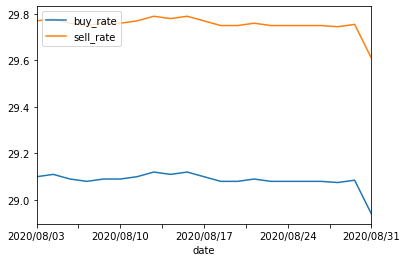

In [47]:
# 先到牌告匯率首頁，爬取所有貨幣的種類
url = 'https://rate.bot.com.tw/xrt?Lang=zh-TW'
resp = requests.get(url)
resp.encoding = 'utf-8'
html = BeautifulSoup(resp.text,'lxml')
rate_table = html.find(name = 'table', attrs = {'title':'牌告匯率'}).find(name='tbody').find_all(name='tr')

# 擷取匯率表格，把美金(也就是匯率表的第一個元素)擷取出來，查詢其歷史匯率
currency = rate_table[0].find(name='div',attrs={'class':'visible-phone print_hide'})
print(currency.get_text().replace(" ","")) # 貨幣種類

# 針對美金，找到其「歷史匯率」的首頁 
history_link = rate_table[0].find(name='td', attrs={'data-table':'歷史匯率'})
history_rate_link = 'https://rate.bot.com.tw' + history_link.a['href']  # 該貨幣的歷史資料首頁
# print(history_rate_link)

# 到貨幣歷史匯率網頁，選則該貨幣的「歷史區間」，送出查詢後，觀察其網址變化情形，再試著抓取其歷史匯率資料
# 用「quote/年-月」去取代網址內容，就可以連到該貨幣的歷史資料
quote_history_url = history_rate_link.replace('history','quote/2020-08')
resp = requests.get(quote_history_url)
resp.encoding = 'utf-8'
history = BeautifulSoup(resp.text,'lxml')
history_table = history.find(name='table',attrs={'title':'歷史本行營業時間牌告匯率'}).find(name='tbody').find_all(name='tr')
# print(history_table)

# 擷取到歷史匯率資料後，把資料彙整起來並畫出趨勢圖
date_history = list()
history_buy = list()
history_sell = list()

for history_rate in history_table:
    # 擷取日期資料
    date_string = history_rate.a.get_text()
    #print(date_string)
    date = datetime.strptime(date_string,'%Y/%M/%d').strftime('%Y/%M/%d') # 轉換日期格式
    #print(date)
    date_history.append(date) # 日期歷史資料
    
    history_ex_rate = history_rate.find_all(name='td',attrs={'class':'rate-content-cash text-right print_table-cell'})
    history_buy.append(float(history_ex_rate[0].get_text())) # 歷史買入匯率
    history_sell.append(float(history_ex_rate[1].get_text())) # 歷史賣出匯率
    
# 將匯率資料建成dataframe形式
HistoryExchangeRate = pd.DataFrame({'date':date_history,
                                    'buy_rate':history_buy,
                                    'sell_rate':history_sell})

HistoryExchangeRate = HistoryExchangeRate.set_index('date') # 指定日期欄位為datafram的index
HistoryExchangeRate = HistoryExchangeRate.sort_index(ascending = True)

# 畫出歷史匯率軌跡圖
plt.figure(figsize=(10,8))
HistoryExchangeRate[['buy_rate','sell_rate']].plot() # x=['date'], y=[['buy_rate','sell_rate']] 
plt.legend(loc="upper left")
plt.show()

In [ ]:
# 作業part 2：爬取每種貨幣對台幣的一個月歷史匯率資料，並畫出趨勢圖


美金(USD)



<Figure size 720x576 with 0 Axes>

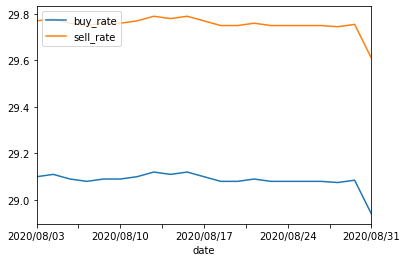


港幣(HKD)



<Figure size 720x576 with 0 Axes>

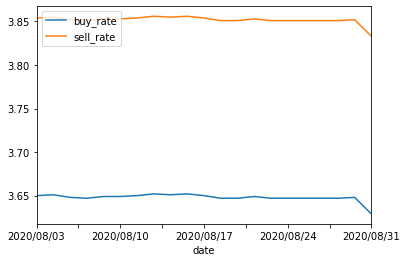


英鎊(GBP)



<Figure size 720x576 with 0 Axes>

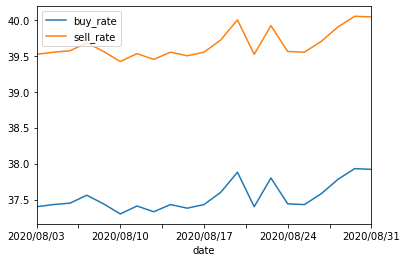


澳幣(AUD)



<Figure size 720x576 with 0 Axes>

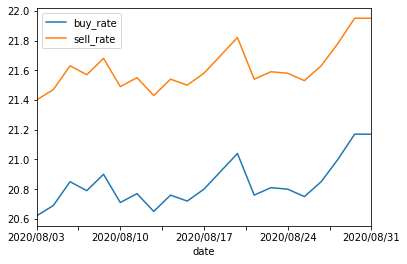


加拿大幣(CAD)



<Figure size 720x576 with 0 Axes>

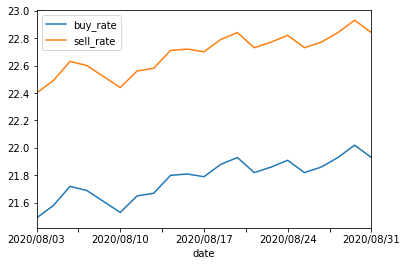


新加坡幣(SGD)



<Figure size 720x576 with 0 Axes>

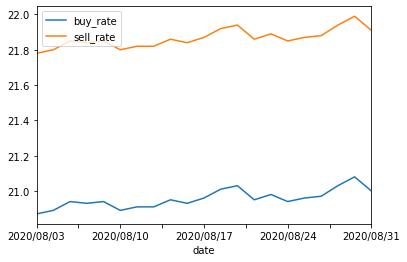


瑞士法郎(CHF)



<Figure size 720x576 with 0 Axes>

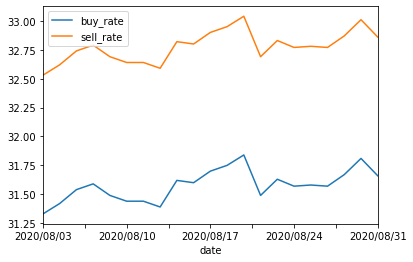


日圓(JPY)



<Figure size 720x576 with 0 Axes>

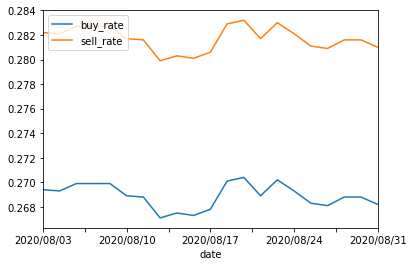


南非幣(ZAR)



<Figure size 720x576 with 0 Axes>

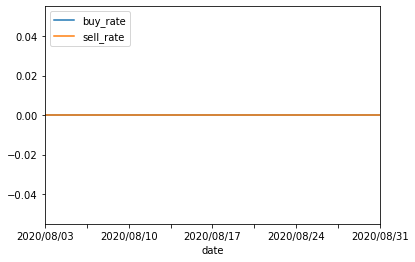


瑞典幣(SEK)



<Figure size 720x576 with 0 Axes>

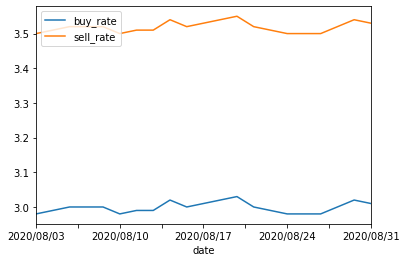


紐元(NZD)



<Figure size 720x576 with 0 Axes>

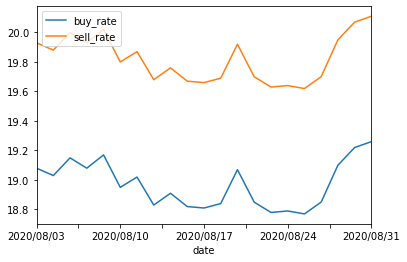


泰幣(THB)



<Figure size 720x576 with 0 Axes>

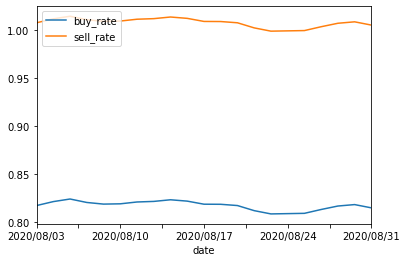


菲國比索(PHP)



<Figure size 720x576 with 0 Axes>

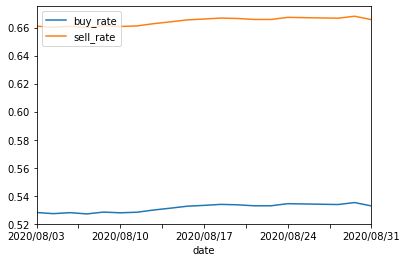


印尼幣(IDR)



<Figure size 720x576 with 0 Axes>

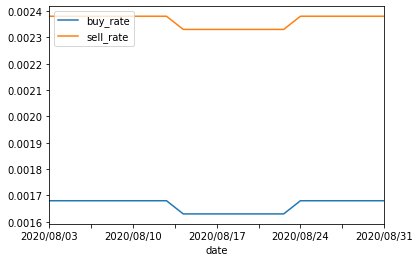


歐元(EUR)



<Figure size 720x576 with 0 Axes>

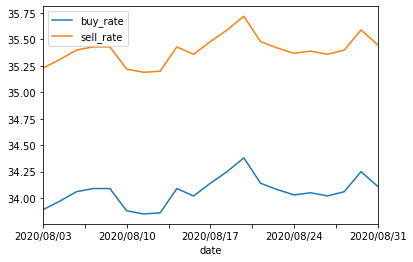


韓元(KRW)



<Figure size 720x576 with 0 Axes>

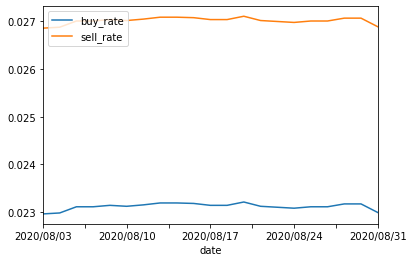


越南盾(VND)



<Figure size 720x576 with 0 Axes>

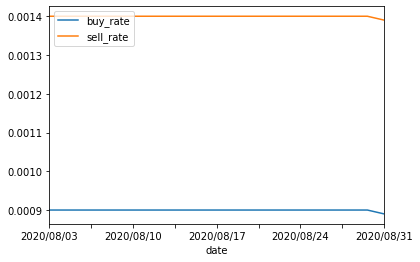


馬來幣(MYR)



<Figure size 720x576 with 0 Axes>

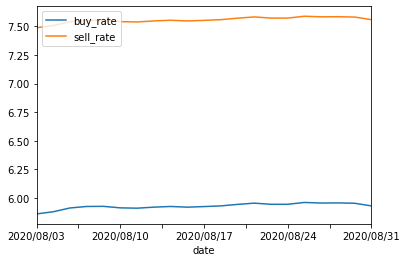


人民幣(CNY)



<Figure size 720x576 with 0 Axes>

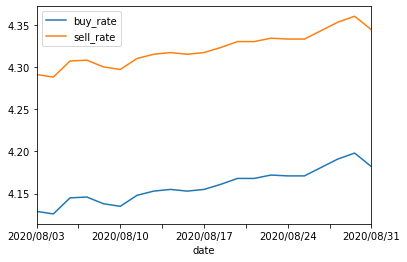

In [49]:
# 先到牌告匯率首頁，爬取所有貨幣的種類
url = 'https://rate.bot.com.tw/xrt?Lang=zh-TW'
resp = requests.get(url)
resp.encoding = 'utf-8'
html = BeautifulSoup(resp.text,'lxml')
rate_table = html.find(name = 'table', attrs = {'title':'牌告匯率'}).find(name='tbody').find_all(name='tr')

for rate in range(len(rate_table)):
    # 擷取匯率表格，把美金(也就是匯率表的第一個元素)擷取出來，查詢其歷史匯率
    currency = rate_table[rate].find(name='div',attrs={'class':'visible-phone print_hide'})
    print(currency.get_text().replace(" ","")) # 貨幣種類

    # 針對美金，找到其「歷史匯率」的首頁 
    history_link = rate_table[rate].find(name='td', attrs={'data-table':'歷史匯率'})
    history_rate_link = 'https://rate.bot.com.tw' + history_link.a['href']  # 該貨幣的歷史資料首頁
    # print(history_rate_link)

    # 到貨幣歷史匯率網頁，選則該貨幣的「歷史區間」，送出查詢後，觀察其網址變化情形，再試著抓取其歷史匯率資料
    # 用「quote/年-月」去取代網址內容，就可以連到該貨幣的歷史資料
    quote_history_url = history_rate_link.replace('history','quote/2020-08')
    resp = requests.get(quote_history_url)
    resp.encoding = 'utf-8'
    history = BeautifulSoup(resp.text,'lxml')
    history_table = history.find(name='table',attrs={'title':'歷史本行營業時間牌告匯率'}).find(name='tbody').find_all(name='tr')
    # print(history_table)

    # 擷取到歷史匯率資料後，把資料彙整起來並畫出趨勢圖
    date_history = list()
    history_buy = list()
    history_sell = list()

    for history_rate in history_table:
        # 擷取日期資料
        date_string = history_rate.a.get_text()
        #print(date_string)
        date = datetime.strptime(date_string,'%Y/%M/%d').strftime('%Y/%M/%d') # 轉換日期格式
        #print(date)
        date_history.append(date) # 日期歷史資料

        history_ex_rate = history_rate.find_all(name='td',attrs={'class':'rate-content-cash text-right print_table-cell'})
        history_buy.append(float(history_ex_rate[0].get_text())) # 歷史買入匯率
        history_sell.append(float(history_ex_rate[1].get_text())) # 歷史賣出匯率

    # 將匯率資料建成dataframe形式
    HistoryExchangeRate = pd.DataFrame({'date':date_history,
                                        'buy_rate':history_buy,
                                        'sell_rate':history_sell})

    HistoryExchangeRate = HistoryExchangeRate.set_index('date') # 指定日期欄位為datafram的index
    HistoryExchangeRate = HistoryExchangeRate.sort_index(ascending = True)

    # 畫出歷史匯率軌跡圖
    plt.figure(figsize=(10,8))
    HistoryExchangeRate[['buy_rate','sell_rate']].plot() # x=['date'], y=[['buy_rate','sell_rate']] 
    plt.legend(loc="upper left")
    plt.show()